The goal of this project is to analyze the number of Covid-19 cases, hospitalizations and deaths for the state of connecticut. The data spans from March 2020 to Apr 2021. To make our analysis easier, we will be analyzing data from May 2020 to Feb 2021.

We will attemp to answer a few questions here:

1. In which month did the most cases and deaths occured?
2. What percentage of people died compared the number of confirmed cases?
3. What percentage of people were hospitalized?
4. Which age groups were most vulnerable to the virus? 
5. Which age group is most likely to die from covid-19? Are we doing any better this year than the last year?
6. What is the likelihood of having covid-19 given that you get a Covid-19 test? This will give us a measure of the test reliability.
7. What is the likelihood of getting hospitalized if you have a confirmed case of covid-19? 
8. What is the likelihood of dying from covid-19?


In [315]:
import pandas as pd
import numpy as np

import os
os.path.isfile('/Users/Diwan/COVID-19.csv')


True

In [316]:
# taking a first look at our raw data
covid_19 = pd.read_csv("COVID-19.csv", low_memory=False)
covid_19.head()

,Date,State,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
0,10/15/2020,CONNECTICUT,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411
1,10/18/2020,CONNECTICUT,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451
2,10/19/2020,CONNECTICUT,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470
3,10/20/2020,CONNECTICUT,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487
4,10/21/2020,CONNECTICUT,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506


In [317]:
#replacing missing values with the mean

covid_19 = covid_19.fillna(covid_19.mean())
covid_19.head()



,Date,State,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
0,10/15/2020,CONNECTICUT,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411
1,10/18/2020,CONNECTICUT,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451
2,10/19/2020,CONNECTICUT,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470
3,10/20/2020,CONNECTICUT,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487
4,10/21/2020,CONNECTICUT,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506


We can also drop the State column since the entire dataset belongs to Connecticut.

In [318]:
covid_19 = covid_19.drop('State', 1)
covid_19.head()

,Date,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
0,10/15/2020,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411
1,10/18/2020,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451
2,10/19/2020,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470
3,10/20/2020,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487
4,10/21/2020,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506


Since there are no duplicated months for the duration, we will sort and group the data by month to make our analysis easier. 

In [319]:
# changing the date type so we can sort and group by month. this adds a new month column and now we can drop the date column

covid_19['Date'] = pd.to_datetime(covid_19['Date'])
covid_19['Month'] = covid_19['Date'].dt.month

covid_19 = covid_19.drop('Date', 1)
covid_19.head()


,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older,Month
0,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411,10
1,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451,10
2,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470,10
3,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487,10
4,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506,10


In [320]:
# bringing the month column to start of the data frame 
col_1 = ['Month']
covid_19 = covid_19[[c for c in col_1 if c in covid_19] + [c for c in covid_19 if c not in col_1]]
covid_19.head()


,Month,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
0,10,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411
1,10,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451
2,10,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470
3,10,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487
4,10,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506


In [321]:
# dropping march and april rows

covid_19 = covid_19[covid_19.Month != 4]
covid_19 = covid_19[covid_19.Month != 3]

# grouping by month tells us the total number of cases, deaths and hospitalizations for each month
covid_19.groupby('Month').sum().sort_values("Confirmed deaths", ascending = False)



,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
Month,,,,,,,,,,,,,,,,,
5,5358624.0,1137649,3.874092e+06,254539.340426,30921,102548,136492.914894,32315.595745,11263,26442,125600,158221,162980,199896,168914,111477,168693
2,125697958.0,5387882,5.049758e+06,338124.000000,13024,148337,121522.000000,26815.000000,288837,568714,919797,826944,753934,832556,574664,312134,308365
1,111689656.0,4944578,4.651476e+06,293102.000000,23861,145525,118233.000000,27292.000000,245714,498907,845161,762535,693108,765328,533003,294867,304686
6,10849985.0,1352489,1.293182e+06,59307.000000,6438,125758,100238.000000,25520.000000,18106,37572,158456,190872,190494,229698,191600,128517,203433
12,80848289.0,3282150,3.084283e+06,197867.000000,25178,116031,93722.000000,22309.000000,144665,311877,562435,507495,459834,503658,356135,203968,231003
11,58354184.0,1960944,1.833003e+06,127941.000000,14820,100464,80741.000000,19723.000000,67123,157421,330693,303106,271066,300842,219322,133668,176917
8,21668415.0,1128386,1.083722e+06,44664.000000,1253,97964,78513.000000,19451.000000,18710,44471,147769,163023,158390,187158,151679,100449,155672
7,13903559.0,1055757,1.012175e+06,43582.000000,1565,96454,77167.000000,19287.000000,15508,33722,131439,150126,148276,177251,146258,98027,153911
10,41630988.0,1337889,1.282440e+06,55449.000000,4269,95653,76719.000000,18934.000000,32192,80539,202858,198531,184691,212001,164522,105880,156093


Answer 1:

By sorting the values by the number of confirmed deaths, we can see that the highest number of deaths occurred in May 2020, followed by a decrease in June and July, and relatively remained stable until rising again near the end of the year in the months of November and December and continuing into 2021. 

The highest number of confirmed cases were reported in Feb 2021.

The hihghest number of people were hospitalized in May 2020.

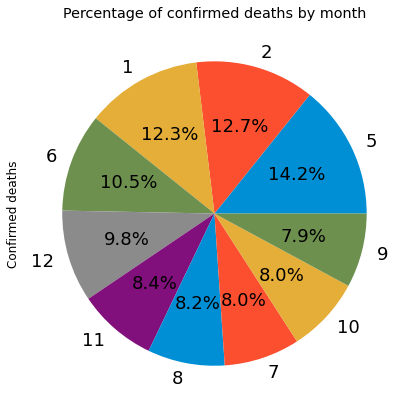

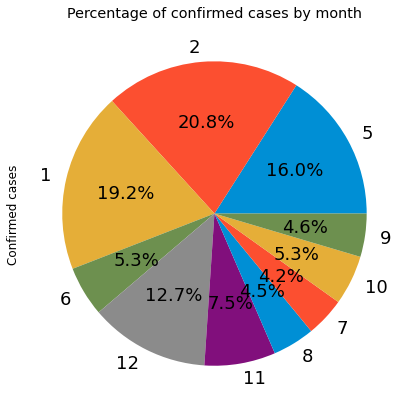

In [332]:
covid_month = covid_19.groupby('Month').sum().sort_values("Confirmed deaths", ascending = False)
covid_month.plot.pie(title="Percentage of confirmed deaths by month",y='Confirmed deaths', autopct='%1.1f%%', fontsize=18, figsize=(11, 7), legend = False)
covid_month.plot.pie(title="Percentage of confirmed cases by month",y='Confirmed cases', autopct='%1.1f%%', fontsize=18, figsize=(11, 7), legend = False)



We can see from the pie chart the the highest percentage of people dies in May 2020. Even though the number of cases increased significantly in 2021, the percentage of deaths is still lower than the 2020 months that had the most cases.  

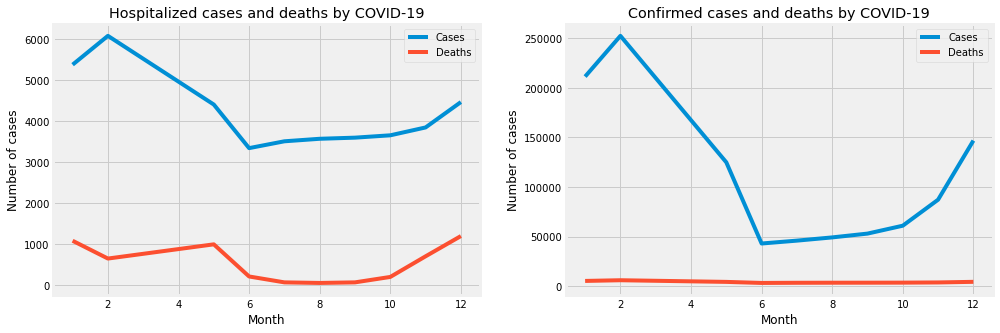

In [286]:
#grouping by the month and plotting the number of confirmed cases, hopitalizations and confirmed deaths for each month.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
covid_19_mean = covid_19.groupby('Month').mean()
covid_19_mean['Confirmed deaths'].plot.line()
covid_19_mean['Hospitalized cases'].plot.line()
plt.legend(["Cases", "Deaths"], loc ="upper right")
plt.xticks()

plt.title('Hospitalized cases and deaths by COVID-19')
plt.ylabel('Number of cases')
plt.xlabel('Month')

plt.subplot(1, 2, 2)
covid_19_mean = covid_19.groupby('Month').mean()
covid_19_mean['Confirmed cases'].plot.line()
covid_19_mean['Confirmed deaths'].plot.line()
plt.legend(["Cases", "Deaths"], loc ="upper right")
plt.xticks()

plt.title('Confirmed cases and deaths by COVID-19')
plt.ylabel('Number of cases')
plt.xlabel('Month')

plt.show()


In [287]:
#calculating the percentage of people that died and percentage that got hospitalized and adding these as a new column

covid_19_sum['% Deaths'] = covid_19_sum['Confirmed deaths']/covid_19_sum['Confirmed cases']*100
covid_19_sum['% Hospitalized'] = covid_19_sum['Hospitalized cases']/covid_19_sum['Confirmed cases']*100
covid_19_sum


,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,...,cases_age80_Older,% Deaths,% Hospitalized,under 20 years,20 years - 50 years,over 50 years,likelihood,likelihood of having covid-19,likelihood of hospitalization,likelihood of dying
Month,,,,,,,,,,,,,,,,,,,,,
1,111689656.0,4944578,4.651476e+06,293102.000000,23861,145525,118233.000000,27292.000000,245714,498907,...,304686,2.541838,0.512977,744621,2300804,1897884,0.041646,0.041646,0.005130,0.025418
2,125697958.0,5387882,5.049758e+06,338124.000000,13024,148337,121522.000000,26815.000000,288837,568714,...,308365,2.406492,0.257913,857551,2500675,2027719,0.040174,0.040174,0.002579,0.024065
5,5358624.0,1137649,3.874092e+06,254539.340426,30921,102548,136492.914894,32315.595745,11263,26442,...,168693,3.523223,0.798148,37705,446801,648980,0.722964,0.722964,0.007981,0.035232
6,10849985.0,1352489,1.293182e+06,59307.000000,6438,125758,100238.000000,25520.000000,18106,37572,...,203433,7.751268,0.497842,55678,539822,753248,0.119187,0.119187,0.004978,0.077513
7,13903559.0,1055757,1.012175e+06,43582.000000,1565,96454,77167.000000,19287.000000,15508,33722,...,153911,7.623879,0.154618,49230,429841,575447,0.072800,0.072800,0.001546,0.076239
8,21668415.0,1128386,1.083722e+06,44664.000000,1253,97964,78513.000000,19451.000000,18710,44471,...,155672,7.244755,0.115620,63181,469182,594958,0.050014,0.050014,0.001156,0.072448
9,29640796.0,1163085,1.114982e+06,48103.000000,1492,94261,75522.000000,18739.000000,22353,56780,...,150472,6.773383,0.133814,79133,494423,588956,0.037616,0.037616,0.001338,0.067734
10,41630988.0,1337889,1.282440e+06,55449.000000,4269,95653,76719.000000,18934.000000,32192,80539,...,156093,5.982268,0.332881,112731,586080,638496,0.030805,0.030805,0.003329,0.059823
11,58354184.0,1960944,1.833003e+06,127941.000000,14820,100464,80741.000000,19723.000000,67123,157421,...,176917,4.404848,0.808509,224544,904865,830749,0.031412,0.031412,0.008085,0.044048


Answer 2 and 3: 

We can see that the percentage of people that were hospitalized for the state of Connecticut was not too high. This means that from the confirmed cases, a lot if the people were able to recover on their own. This could also mean that percentage population of Connecticut might include more younger adults.

The precentage of deaths was less than 10%. 

In [288]:
# for the ease of our analysis, we are dividing our population into 3 different age groups and adding these as a new column to the data frame
covid_19_sum['under 20 years'] = covid_19_sum['cases_age0_9'] +  covid_19_sum['cases_age10_19']
covid_19_sum['20 years - 50 years'] = covid_19_sum['cases_age20_29'] + covid_19_sum['cases_age30_39'] + covid_19_sum['cases_age40_49']
covid_19_sum['over 50 years'] = covid_19_sum['cases_age50_59'] + covid_19_sum['cases_age60_69'] + covid_19_sum['cases_age70_79'] + covid_19_sum['cases_age80_Older']

covid_19_sum = covid_19_sum.sort_values("Month")

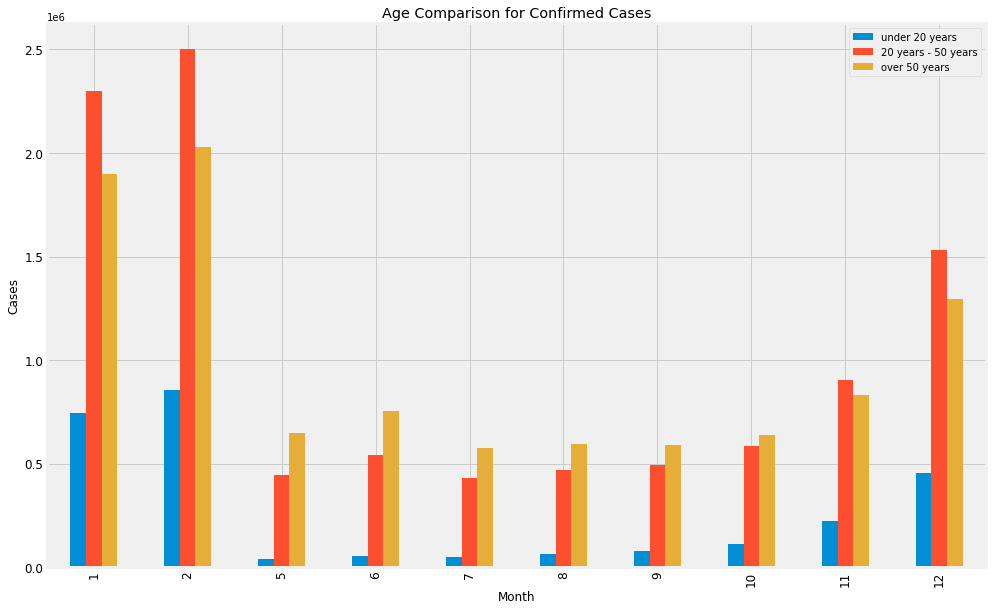

In [289]:
# Comparing age groups for number of confirmed cases

import matplotlib.pyplot as plt
ax = covid_19_sum[['under 20 years','20 years - 50 years', 'over 50 years']].plot(kind='bar', title ="Age Comparison for Confirmed Cases", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Cases", fontsize=12)
plt.show()



Answer 4:

We can see from the graph that initially from May 2020 to Oct 2020, the most vulnerable age group for the state of Connecticut was over 50 years. What is interesting is that after that the cases started rising more among the 20 years to 50 years age group. The cases continued to drastcially increase in 2021. The population under 20 years remained the least likely to get infected with the virus throughout the time period. 



In [292]:
# we can add the total number of cases, hospitalizations and deaths and add it to the end of the column
sums = covid_19_sum.select_dtypes(pd.np.number).sum().rename('Total')
covid_19_sum.append(sums)


<ipython-input-292-534a7ed148af>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sums = covid_19_sum.select_dtypes(pd.np.number).sum().rename('Total')


,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,...,cases_age80_Older,% Deaths,% Hospitalized,under 20 years,20 years - 50 years,over 50 years,likelihood,likelihood of having covid-19,likelihood of hospitalization,likelihood of dying
Month,,,,,,,,,,,,,,,,,,,,,
1,111689656.0,4944578.0,4.651476e+06,2.931020e+05,23861.0,145525.0,118233.000000,27292.000000,245714.0,498907.0,...,304686.0,2.541838,0.512977,744621.0,2300804.0,1897884.0,0.041646,0.041646,0.005130,0.025418
2,125697958.0,5387882.0,5.049758e+06,3.381240e+05,13024.0,148337.0,121522.000000,26815.000000,288837.0,568714.0,...,308365.0,2.406492,0.257913,857551.0,2500675.0,2027719.0,0.040174,0.040174,0.002579,0.024065
5,5358624.0,1137649.0,3.874092e+06,2.545393e+05,30921.0,102548.0,136492.914894,32315.595745,11263.0,26442.0,...,168693.0,3.523223,0.798148,37705.0,446801.0,648980.0,0.722964,0.722964,0.007981,0.035232
6,10849985.0,1352489.0,1.293182e+06,5.930700e+04,6438.0,125758.0,100238.000000,25520.000000,18106.0,37572.0,...,203433.0,7.751268,0.497842,55678.0,539822.0,753248.0,0.119187,0.119187,0.004978,0.077513
7,13903559.0,1055757.0,1.012175e+06,4.358200e+04,1565.0,96454.0,77167.000000,19287.000000,15508.0,33722.0,...,153911.0,7.623879,0.154618,49230.0,429841.0,575447.0,0.072800,0.072800,0.001546,0.076239
8,21668415.0,1128386.0,1.083722e+06,4.466400e+04,1253.0,97964.0,78513.000000,19451.000000,18710.0,44471.0,...,155672.0,7.244755,0.115620,63181.0,469182.0,594958.0,0.050014,0.050014,0.001156,0.072448
9,29640796.0,1163085.0,1.114982e+06,4.810300e+04,1492.0,94261.0,75522.000000,18739.000000,22353.0,56780.0,...,150472.0,6.773383,0.133814,79133.0,494423.0,588956.0,0.037616,0.037616,0.001338,0.067734
10,41630988.0,1337889.0,1.282440e+06,5.544900e+04,4269.0,95653.0,76719.000000,18934.000000,32192.0,80539.0,...,156093.0,5.982268,0.332881,112731.0,586080.0,638496.0,0.030805,0.030805,0.003329,0.059823
11,58354184.0,1960944.0,1.833003e+06,1.279410e+05,14820.0,100464.0,80741.000000,19723.000000,67123.0,157421.0,...,176917.0,4.404848,0.808509,224544.0,904865.0,830749.0,0.031412,0.031412,0.008085,0.044048


In [293]:
covid_19_sum['likelihood of having covid-19'] = covid_19_sum['Confirmed cases'] / covid_19_sum['COVID-19 tests reported']
covid_19_sum['likelihood of hospitalization'] = covid_19_sum['Hospitalized cases'] / covid_19_sum['Confirmed cases']
covid_19_sum['likelihood of dying'] = covid_19_sum['Confirmed deaths'] / covid_19_sum['Confirmed cases']

covid_19_likelihoods = covid_19_sum[["likelihood of having covid-19","likelihood of hospitalization", "likelihood of dying"]]

covid_19_likelihoods

,likelihood of having covid-19,likelihood of hospitalization,likelihood of dying
Month,,,
1,0.041646,0.005130,0.025418
2,0.040174,0.002579,0.024065
5,0.722964,0.007981,0.035232
6,0.119187,0.004978,0.077513
7,0.072800,0.001546,0.076239
8,0.050014,0.001156,0.072448
9,0.037616,0.001338,0.067734
10,0.030805,0.003329,0.059823
11,0.031412,0.008085,0.044048


Conclusion: 
    
By sorting the values by the number of confirmed deaths, we can see that the highest number of deaths occurred in May 2020, followed by a decrease in June and July, and relatively remained stable until rising again near the end of the year in the months of November and December and continuing into 2021.

The highest number of confirmed cases were reported in Feb 2021. The hihghest number of people were hospitalized in May 2020.
We can see from the pie chart the the highest percentage of people dies in May 2020. Even though the number of cases increased significantly in 2021, the percentage of deaths is still lower than the 2020 months that had the most cases.  

We can see that the percentage of people that were hospitalized for the state of Connecticut was not too high. This means that from the confirmed cases, a lot if the people were able to recover on their own. This could also mean that percentage population of Connecticut might include more younger adults.

The precentage of deaths was less than 10%.

We can see from the graph that initially from May 2020 to Oct 2020, the most vulnerable age group for the state of Connecticut was over 50 years. What is interesting is that after Oct 2020, the cases started rising more among the 20 years to 50 years age group. The cases continued to drastcially increase in 2021. The population under 20 years remained the least likely to get infected with the virus throughout the time period.